<h1 style="color:blue"> Part A: IMDb Movie Review Sentiment Analysis</h1>

<h3>1. Overview</h3><p style="color:green">
 Sentiment analysis is a natural language processing (NLP) task that involves determining
 whether a given text expresses a positive or negative sentiment. In this project, we will
 analyze movie reviews from the IMDb dataset and predict the sentiment (positive or
 negative) based on the text of the reviews. By leveraging various text preprocessing
 techniques, feature extraction methods, and classification algorithms, this project will
 develop a machine learning model capable of accurately predicting the sentiment of movie
 reviews. The insights derived from this analysis can be useful for movie producers, critics,
 and platforms like IMDb to understand public opinion and tailor marketing or content
 strategies ac </p>gly.</h3>

<h2>2. Problem Statement</h2> 
<p style="color:green"> The primary objective of this project is to build a machine learning classification model that
 can predict the sentiment of IMDb movie reviews. The dataset contains a collection of movie
 reviews, and each review is labeled as either positive or negative.
 Using text preprocessing, feature extraction techniques (such as TF-IDF), and various
 classification algorithms, the project will aim to develop a model that can effectively classify
 the sentiment of movie reviews. The model's performance will be evaluated using standard
 classification metrics, such as accuracy, precision, recall, and F1</p>-score.

<h2> 3. Dataset Information</h2>

<p style="color:green">The IMDb dataset contains a large number of movie reviews, each labeled with either a
 positive or negative sentiment<br>.
 <b>● Textof the revie </b>w: The actual review provided by the use<br>r.
<b> ● Sentiment lab </b>el: The sentiment of the review, either "positive" or "negativ</p>e."

<h1>Project  Deliverables</h1>

<h2> 1. Data Exploration and Preprocessing (5 Marks)</h2>

<h4>Basic Data Exploration</h4>

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("Imdb - data_imdb.csv")

In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<h4>Checking Null Value</h4>

In [4]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


<h4> identifying imbalanced classes (positive/negative)</h4>

In [6]:
sentiment_count = df["sentiment"].value_counts(normalize=True)*100
sentiment_count

sentiment
positive    50.0
negative    50.0
Name: proportion, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:

# Count the number of positive and negative reviews
sentiment_counts = df["sentiment"].value_counts()

In [9]:

# Calculate review lengths
df["review_length"] = df["review"].apply(len)

Text(0.5, 0, 'Sentiment')

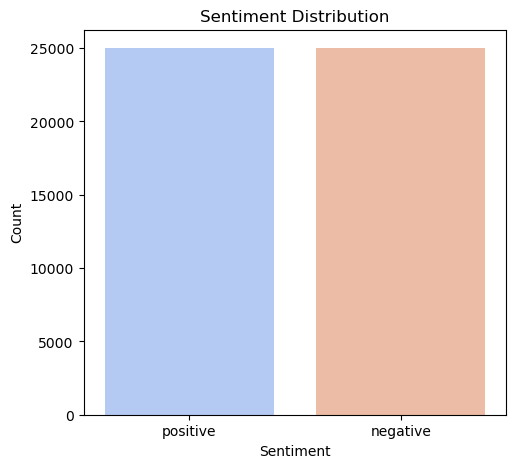

In [10]:

# Plot sentiment distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette="coolwarm")
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.xlabel("Sentiment")

C:\Users\Shivam\anaconda3\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


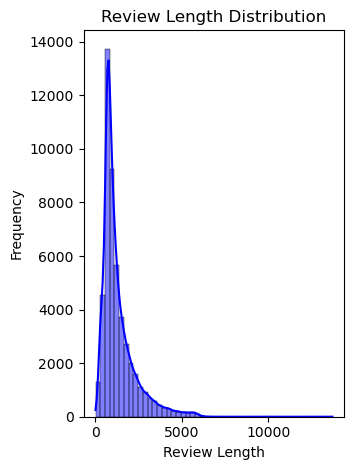

In [11]:

# Plot review length distribution
plt.subplot(1, 2, 2)
sns.histplot(df["review_length"], bins=50, kde=True, color="blue")
plt.title("Review Length Distribution")
plt.xlabel("Review Length")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

In [12]:
sentiment_counts, df["review_length"].describe()

(sentiment
 positive    25000
 negative    25000
 Name: count, dtype: int64,
 count    50000.000000
 mean      1309.367720
 std        989.759532
 min          7.000000
 25%        699.000000
 50%        970.000000
 75%       1590.000000
 max      13704.000000
 Name: review_length, dtype: float64)

<h3> Perform data cleaning and text preprocessing.</h3>

<h4>Removing stop words, punctuation, and special characters.
</h4>

In [13]:
import string
from nltk.corpus import stopwords
import nltk

In [14]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shivam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stop_words = set(stopwords.words('english'))

In [16]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
punctuations = string.punctuation

In [18]:
def clean_text(text):
    text = text.lower()
    text = "".join([char for  char in text if char not in punctuations])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

In [19]:
df['cleanned_review'] = df['review'].apply(clean_text)

In [20]:
df[["review", "cleanned_review"]].head()

,review,cleanned_review
0,One of the other reviewers has mentioned that ...,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,wonderful little production br br filming tech...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically theres family little boy jake thinks...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter matteis love time money visually stunni...


<h4>Tokenization of text (splitting text into words)</h4>

In [21]:
from nltk.tokenize import word_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to C:\Users\Shivam/nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
import nltk
nltk.data.find('tokenizers/punkt')

FileSystemPathPointer('C:\\Users\\Shivam\\nltk_data\\tokenizers\\punkt')

In [23]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shivam/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [24]:
df["tokenized_review"] = df["cleanned_review"].apply(word_tokenize)

In [25]:
df[["cleanned_review", "tokenized_review"]].head()

,cleanned_review,tokenized_review
0,one reviewers mentioned watching 1 oz episode ...,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,wonderful little production br br filming tech...,"[wonderful, little, production, br, br, filmin..."
2,thought wonderful way spend time hot summer we...,"[thought, wonderful, way, spend, time, hot, su..."
3,basically theres family little boy jake thinks...,"[basically, theres, family, little, boy, jake,..."
4,petter matteis love time money visually stunni...,"[petter, matteis, love, time, money, visually,..."


<h3> Lemmatization and stemming.</h3>

In [26]:
from nltk.stem import PorterStemmer, WordNetLemmatizer

In [27]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [28]:
nltk.download("wordnet")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shivam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
df["stemmed_review"] = df["tokenized_review"].apply(lambda tokens: [stemmer.stem(word) for word in tokens])

In [30]:
df["lemmatized_review"] = df["tokenized_review"].apply(lambda tokens: [lemmatizer.lemmatize(word) for word in tokens])

In [31]:
df[["tokenized_review", "stemmed_review", "lemmatized_review"]].head()

,tokenized_review,stemmed_review,lemmatized_review
0,"[one, reviewers, mentioned, watching, 1, oz, e...","[one, review, mention, watch, 1, oz, episod, y...","[one, reviewer, mentioned, watching, 1, oz, ep..."
1,"[wonderful, little, production, br, br, filmin...","[wonder, littl, product, br, br, film, techniq...","[wonderful, little, production, br, br, filmin..."
2,"[thought, wonderful, way, spend, time, hot, su...","[thought, wonder, way, spend, time, hot, summe...","[thought, wonderful, way, spend, time, hot, su..."
3,"[basically, theres, family, little, boy, jake,...","[basic, there, famili, littl, boy, jake, think...","[basically, there, family, little, boy, jake, ..."
4,"[petter, matteis, love, time, money, visually,...","[petter, mattei, love, time, money, visual, st...","[petter, matteis, love, time, money, visually,..."


<h3>Vectorization using techniques like Bag-of-Words and TF-IDF.</h3>

In [32]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [33]:
bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

In [34]:
bow_matrix = bow_vectorizer.fit_transform(df)

In [35]:
tfidf_matrix = tfidf_vectorizer.fit_transform(df)

In [36]:
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [37]:
bow_df

,cleanned_review,lemmatized_review,review,review_length,sentiment,stemmed_review,tokenized_review
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,1,0,0,0,0,0,0
4,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0


In [38]:
 tfidf_df

,cleanned_review,lemmatized_review,review,review_length,sentiment,stemmed_review,tokenized_review
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
df["word_count"] = df["cleanned_review"].apply(lambda x: len(x.split()))
df["char_count"] = df["cleanned_review"].apply(len)
df["avg_word_length"] = df["char_count"] / df["word_count"]

In [41]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_features = tfidf_vectorizer.fit_transform(df["cleanned_review"])

In [42]:
tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

In [43]:

df[["word_count", "char_count", "avg_word_length"]].head()

,word_count,char_count,avg_word_length
0,171,1168,6.830409
1,90,674,7.488889
2,88,591,6.715909
3,72,473,6.569444
4,130,876,6.738462


In [44]:
tfidf_df.head()

,10,100,1010,11,110,12,13,13th,14,15,...,youll,young,younger,youre,youth,youve,zero,zombie,zombies,zone
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.060317,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.081479,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.076446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.07906,0.0,0.0,0.0,0.116961,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0


In [45]:
# Check for any issues in the cleaned text data before applying TF-IDF
df["cleanned_review"].dropna(inplace=True)  # Ensure no NaN values

# Retry TF-IDF Vectorization
try:
    tfidf_features = tfidf_vectorizer.fit_transform(df["cleanned_review"])
    tfidf_df = pd.DataFrame(tfidf_features.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
    result = (df[["word_count", "char_count", "avg_word_length"]].head(), tfidf_df.head())
except Exception as e:
    result = str(e)

result

(   word_count  char_count  avg_word_length
 0         171        1168         6.830409
 1          90         674         7.488889
 2          88         591         6.715909
 3          72         473         6.569444
 4         130         876         6.738462,
          10  100  1010   11  110   12   13  13th   14   15  ...     youll  \
 0  0.000000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.060317   
 1  0.000000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   
 2  0.000000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   
 3  0.076446  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   
 4  0.000000  0.0   0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  ...  0.000000   
 
       young  younger    youre  youth  youve  zero    zombie  zombies  zone  
 0  0.000000      0.0  0.00000    0.0    0.0   0.0  0.000000      0.0   0.0  
 1  0.000000      0.0  0.00000    0.0    0.0   0.0  0.000000      0.0   0.0  
 2  0.081479      0.0  0.00000 

<h2>Model Development </h2>

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [47]:

# Encode sentiment labels (positive -> 1, negative -> 0)
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

In [48]:

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_df, df["sentiment"], test_size=0.2, random_state=42)

In [49]:

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Naive Bayes": MultinomialNB(),
    "Support Vector Machine": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

In [50]:

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "classification_report": classification_report(y_test, y_pred, output_dict=True)
    }

In [51]:
results

{'Logistic Regression': {'accuracy': 0.8879,
  'classification_report': {'0': {'precision': 0.8975155279503105,
    'recall': 0.8738157629510179,
    'f1-score': 0.8855070983556327,
    'support': 4961},
   '1': {'precision': 0.8789168278529981,
    'recall': 0.9017662234570352,
    'f1-score': 0.890194926045646,
    'support': 5039},
   'accuracy': 0.8879,
   'macro avg': {'precision': 0.8882161779016543,
    'recall': 0.8877909932040265,
    'f1-score': 0.8878510122006393,
    'support': 10000},
   'weighted avg': {'precision': 0.8881436429712747,
    'recall': 0.8879,
    'f1-score': 0.8878692947286305,
    'support': 10000}}},
 'Naive Bayes': {'accuracy': 0.8526,
  'classification_report': {'0': {'precision': 0.8541539711557993,
    'recall': 0.8476113686756702,
    'f1-score': 0.8508700930797247,
    'support': 4961},
   '1': {'precision': 0.8510931652550718,
    'recall': 0.8575114109942449,
    'f1-score': 0.854290233293792,
    'support': 5039},
   'accuracy': 0.8526,
   'macro

In [64]:
from sklearn.metrics import confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

evaluation_results = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)
    recall = recall_score(y_test, y_pred, pos_label=1) 
    f1 = f1_score(y_test, y_pred, pos_label=1)  
    roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else "N/A"
    cm = confusion_matrix(y_test, y_pred)
    
    evaluation_results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC-AUC": roc_auc,
        "Confusion Matrix": cm.tolist()
    }

evaluation_results

{'Logistic Regression': {'Accuracy': 0.8879,
  'Precision': 0.8789168278529981,
  'Recall': 0.9017662234570352,
  'F1-score': 0.890194926045646,
  'ROC-AUC': 0.9589773441816201,
  'Confusion Matrix': [[4335, 626], [495, 4544]]},
 'Naive Bayes': {'Accuracy': 0.8526,
  'Precision': 0.8510931652550718,
  'Recall': 0.8575114109942449,
  'F1-score': 0.854290233293792,
  'ROC-AUC': 0.931401906491991,
  'Confusion Matrix': [[4205, 756], [718, 4321]]},
 'Support Vector Machine': {'Accuracy': 0.8881,
  'Precision': 0.8801396431342126,
  'Recall': 0.9005755110140901,
  'F1-score': 0.8902403138793527,
  'ROC-AUC': 'N/A',
  'Confusion Matrix': [[4343, 618], [501, 4538]]},
 'Random Forest': {'Accuracy': 0.8542,
  'Precision': 0.8644412782414004,
  'Recall': 0.8428259575312562,
  'F1-score': 0.8534967845659165,
  'ROC-AUC': 0.9317857498450206,
  'Confusion Matrix': [[4295, 666], [792, 4247]]}}

In [55]:
accuracy

0.8879

<h2>Video Discription</h2>

<a href="">here is project discription</a>